# Import Data VIX index of S&500's volatilty fron Yahoofinance

In [4]:
import yfinance as yf
import pandas as pd

In [6]:
# Definir el símbolo del VIX
symbol = "^VIX"

# Descargar datos históricos del VIX (puedes ajustar el rango de fechas)
vix_data = yf.download(symbol, start="1990-01-01", end="2024-12-31")

# Mostrar los primeros registros
print(vix_data.head())

[*********************100%%**********************]  1 of 1 completed
                 Open       High        Low      Close  Adj Close  Volume
Date                                                                     
1990-01-02  17.240000  17.240000  17.240000  17.240000  17.240000       0
1990-01-03  18.190001  18.190001  18.190001  18.190001  18.190001       0
1990-01-04  19.219999  19.219999  19.219999  19.219999  19.219999       0
1990-01-05  20.110001  20.110001  20.110001  20.110001  20.110001       0
1990-01-08  20.260000  20.260000  20.260000  20.260000  20.260000       0


In [9]:
# Asegurar que el índice es datetime
vix_data.index = pd.to_datetime(vix_data.index)

# Crear una columna con el mes y año
vix_data['YearMonth'] = vix_data.index.to_period('M')

# Filtrar el último día de apertura de cada mes
last_day_of_month = vix_data.groupby('YearMonth').tail(1)

# Calcular el promedio trimestral
last_day_of_month['Quarter'] = last_day_of_month.index.to_period('Q')
quarterly_avg = last_day_of_month.groupby('Quarter')['Close'].mean()

# Mostrar los resultados
print(quarterly_avg.head())

Quarter
1990Q1    22.360000
1990Q2    17.463334
1990Q3    26.706667
1990Q4    26.193333
1991Q1    19.673333
Freq: Q-DEC, Name: Close, dtype: float64


<ipython-input-9-be4c5042dc29>:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  last_day_of_month['Quarter'] = last_day_of_month.index.to_period('Q')


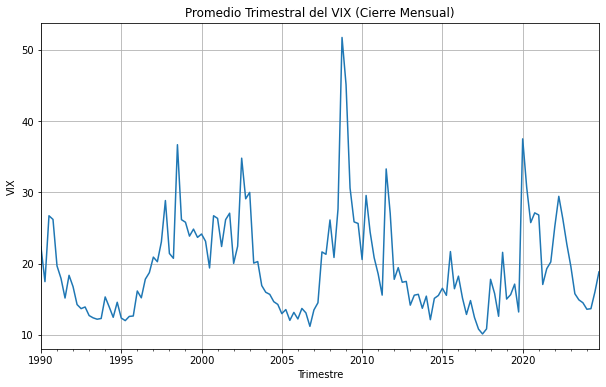

In [10]:
import matplotlib.pyplot as plt

# Graficar el promedio trimestral
quarterly_avg.plot(figsize=(10, 6), title="Promedio Trimestral del VIX (Cierre Mensual)", ylabel="VIX", xlabel="Trimestre")
plt.grid()
plt.show()

In [11]:
pip install openpyxl


Note: you may need to restart the kernel to use updated packages.


In [12]:
# Exportar el promedio trimestral a un archivo Excel
quarterly_avg.to_excel("volatilidad VIX.xlsx")

<ipython-input-12-9bae6d2e1467>:2: UserWarning: Pandas requires version '1.4.3' or newer of 'xlsxwriter' (version '1.3.8' currently installed).
  quarterly_avg.to_excel("volatilidad VIX.xlsx")
